# BREAST CANCER PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

In [2]:
import time

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Histograms

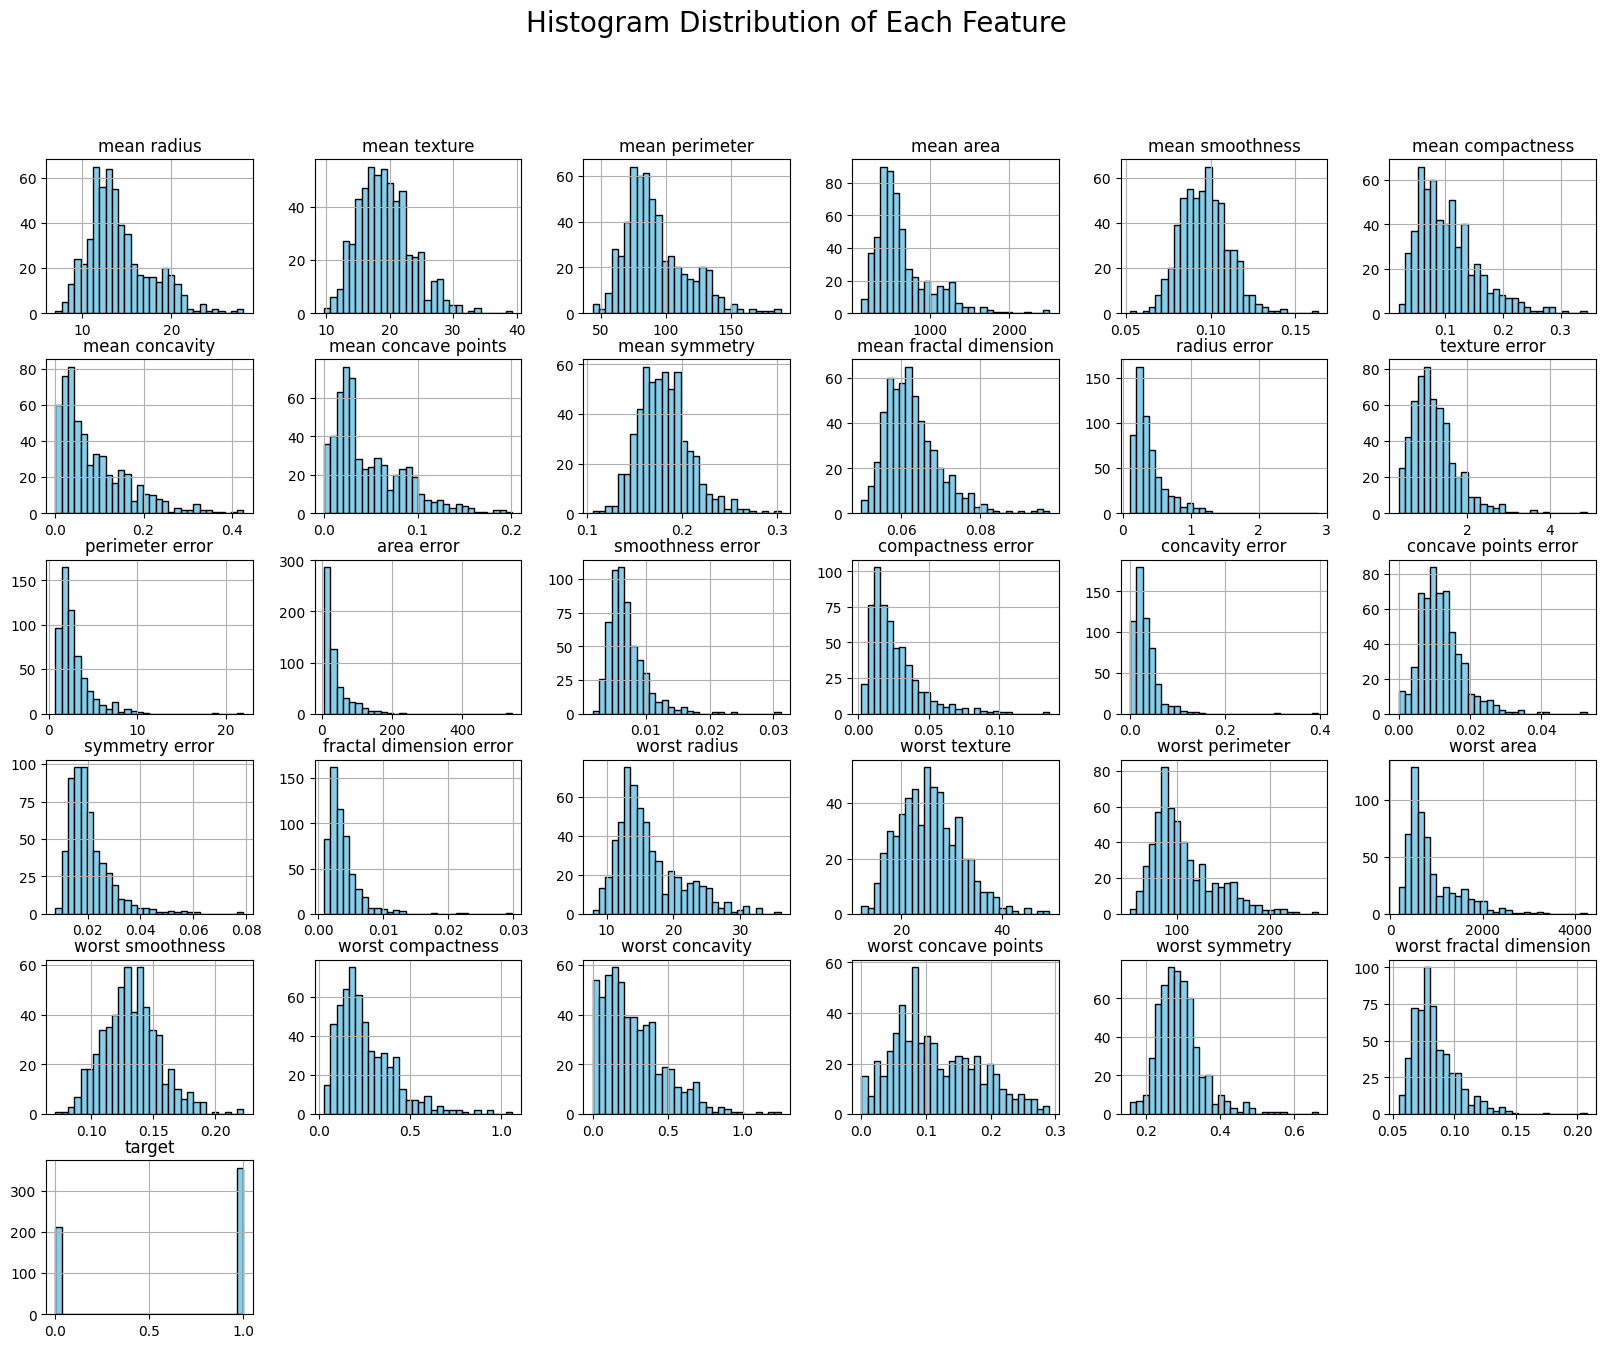

In [7]:
df.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histogram Distribution of Each Feature', fontsize=20)
plt.show()

In [8]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [9]:
df.columns[:-1]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## BoxPots

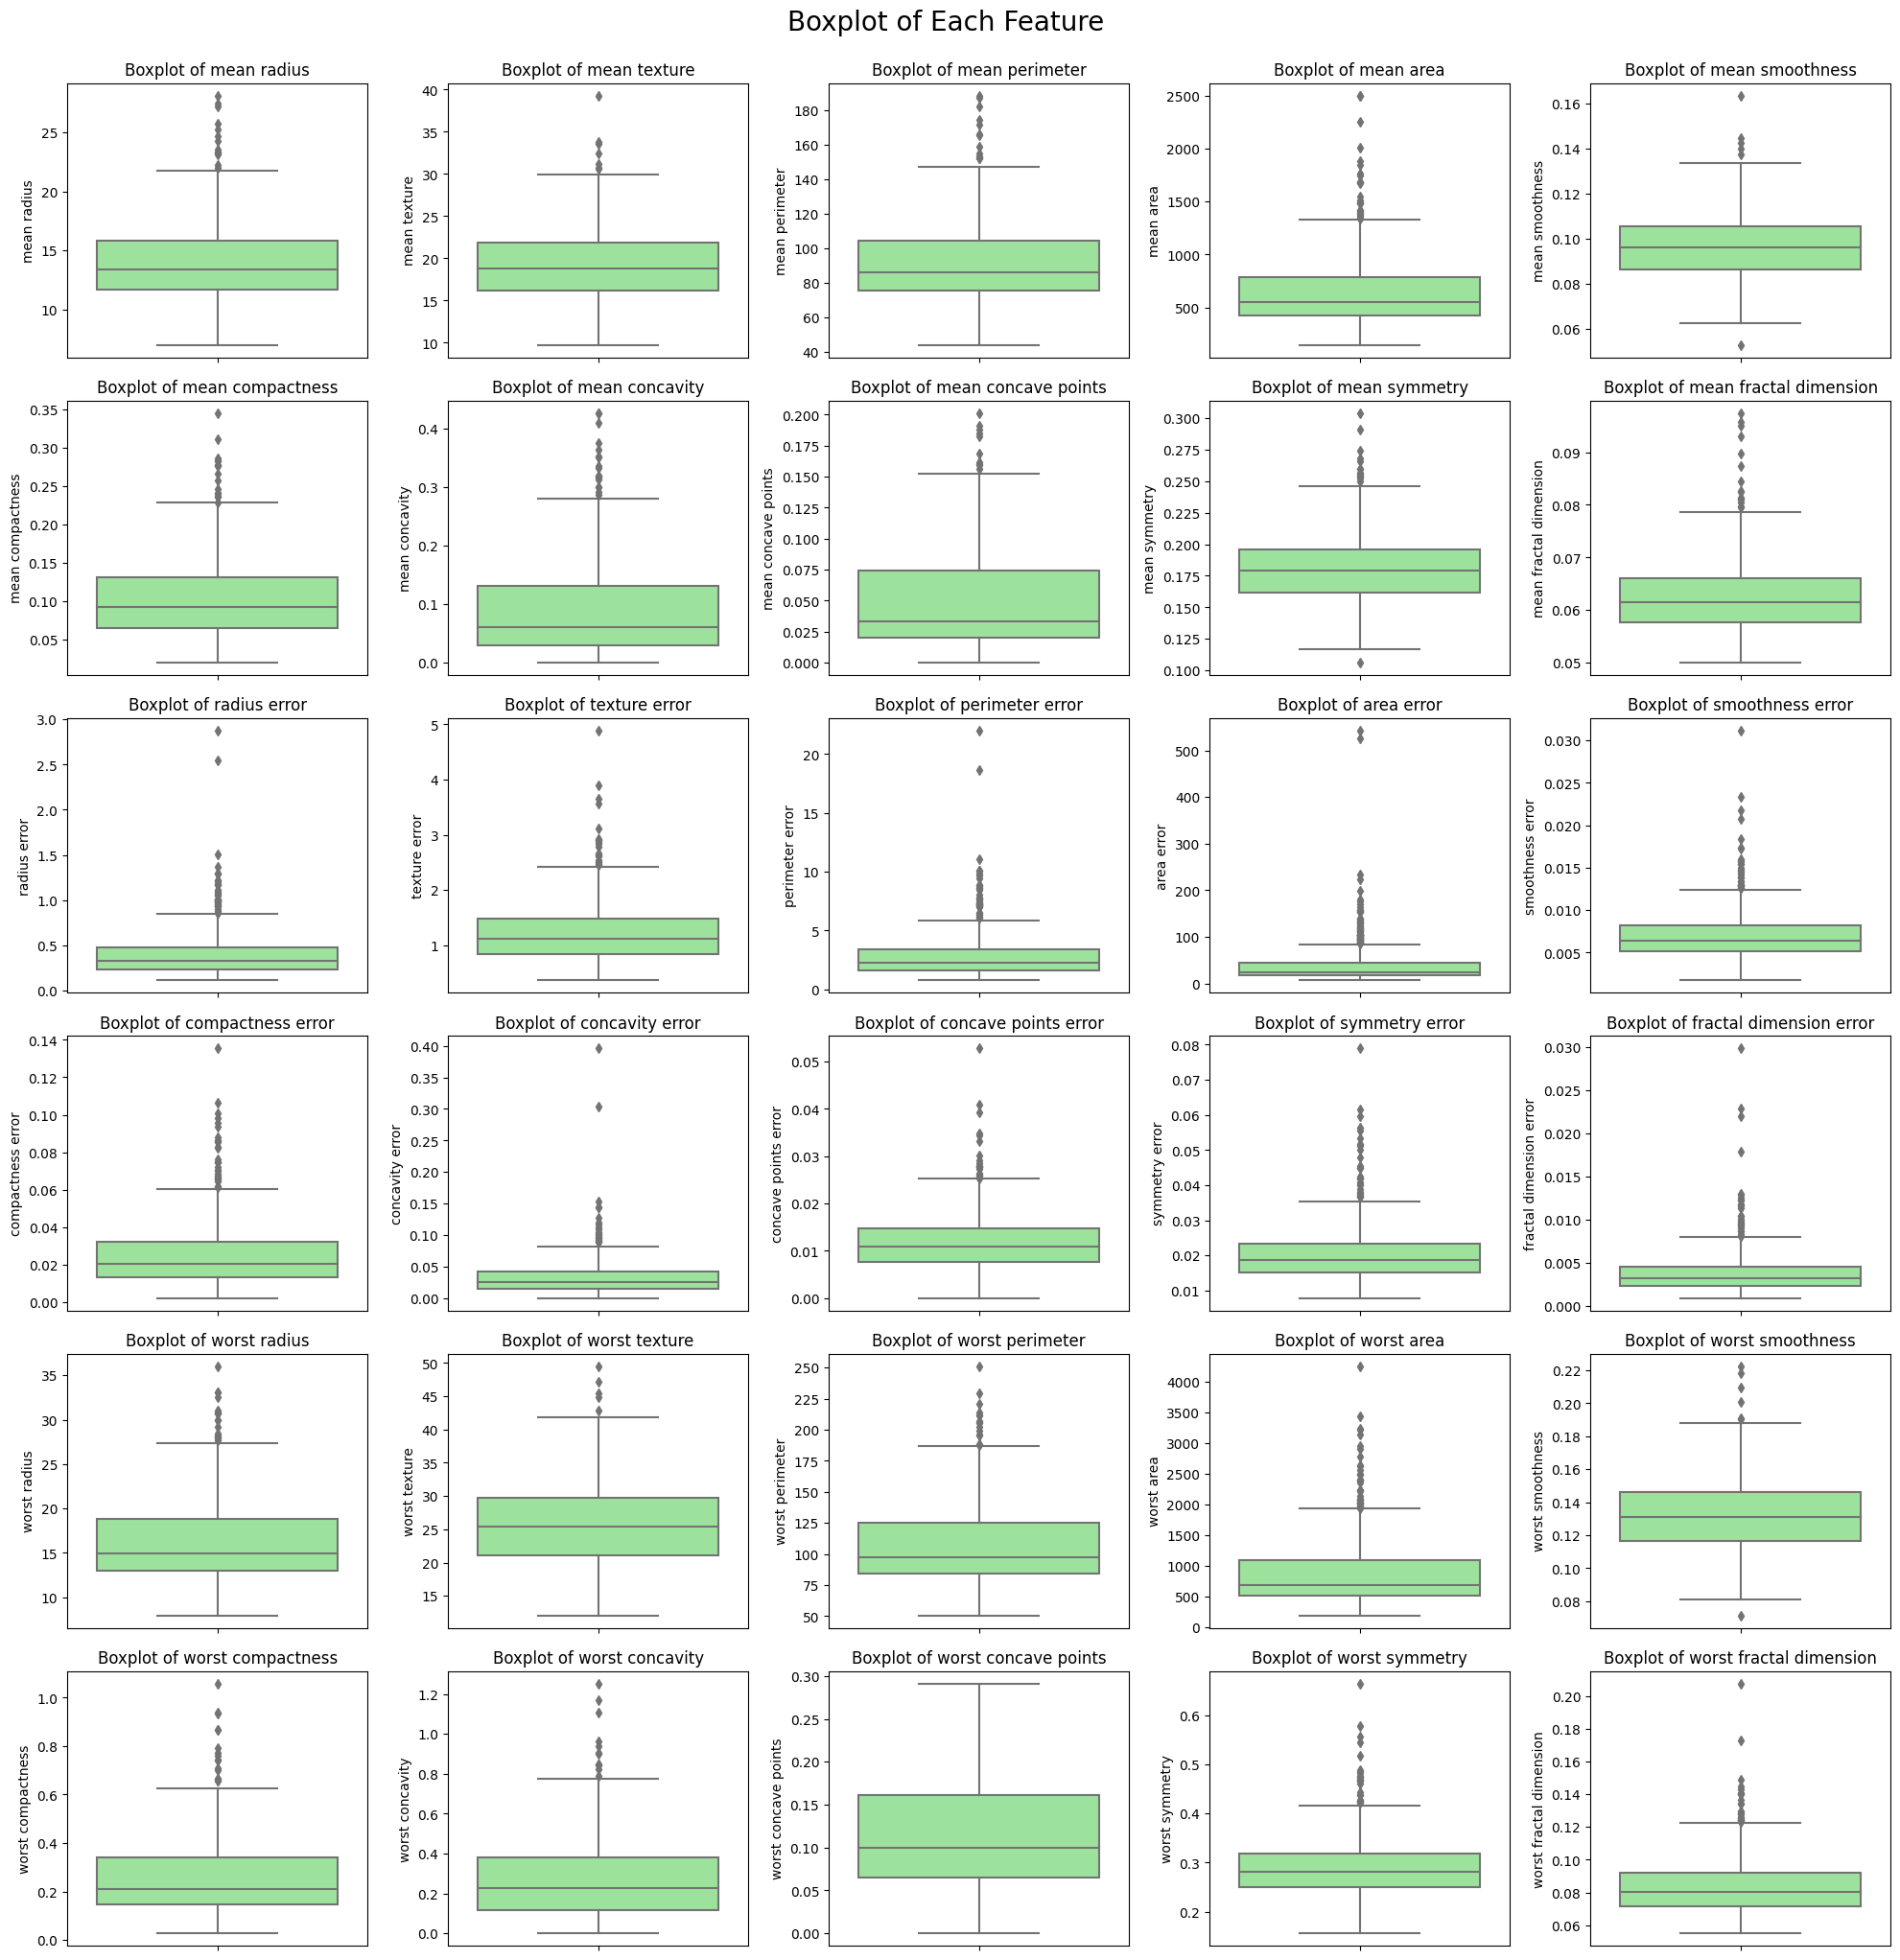

In [10]:
plt.figure(figsize=(20, 20))

for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.suptitle('Boxplot of Each Feature', fontsize=20, y=1.02)
plt.show()

In [11]:
def plot_pairplot(features, title):
    sns.pairplot(df[features + ['target']], hue='target')
    plt.suptitle(title,fontsize=20, y=1.02)
    plt.show()

In [12]:
mean_features = [x for x in df.columns if "mean" in x]
error_features = [x for x in df.columns if "error" in x]
worst_features = [x for x in df.columns if "worst" in x]

In [13]:
print(f"Features with Mean in their name : {np.array(mean_features)}\n")
print(f"Features with Error in their name : {np.array(error_features)}\n")
print(f"Features with Worst in their name : {np.array(worst_features)}\n")

Features with Mean in their name : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension']

Features with Error in their name : ['radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error']

Features with Worst in their name : ['worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



## PairPlots

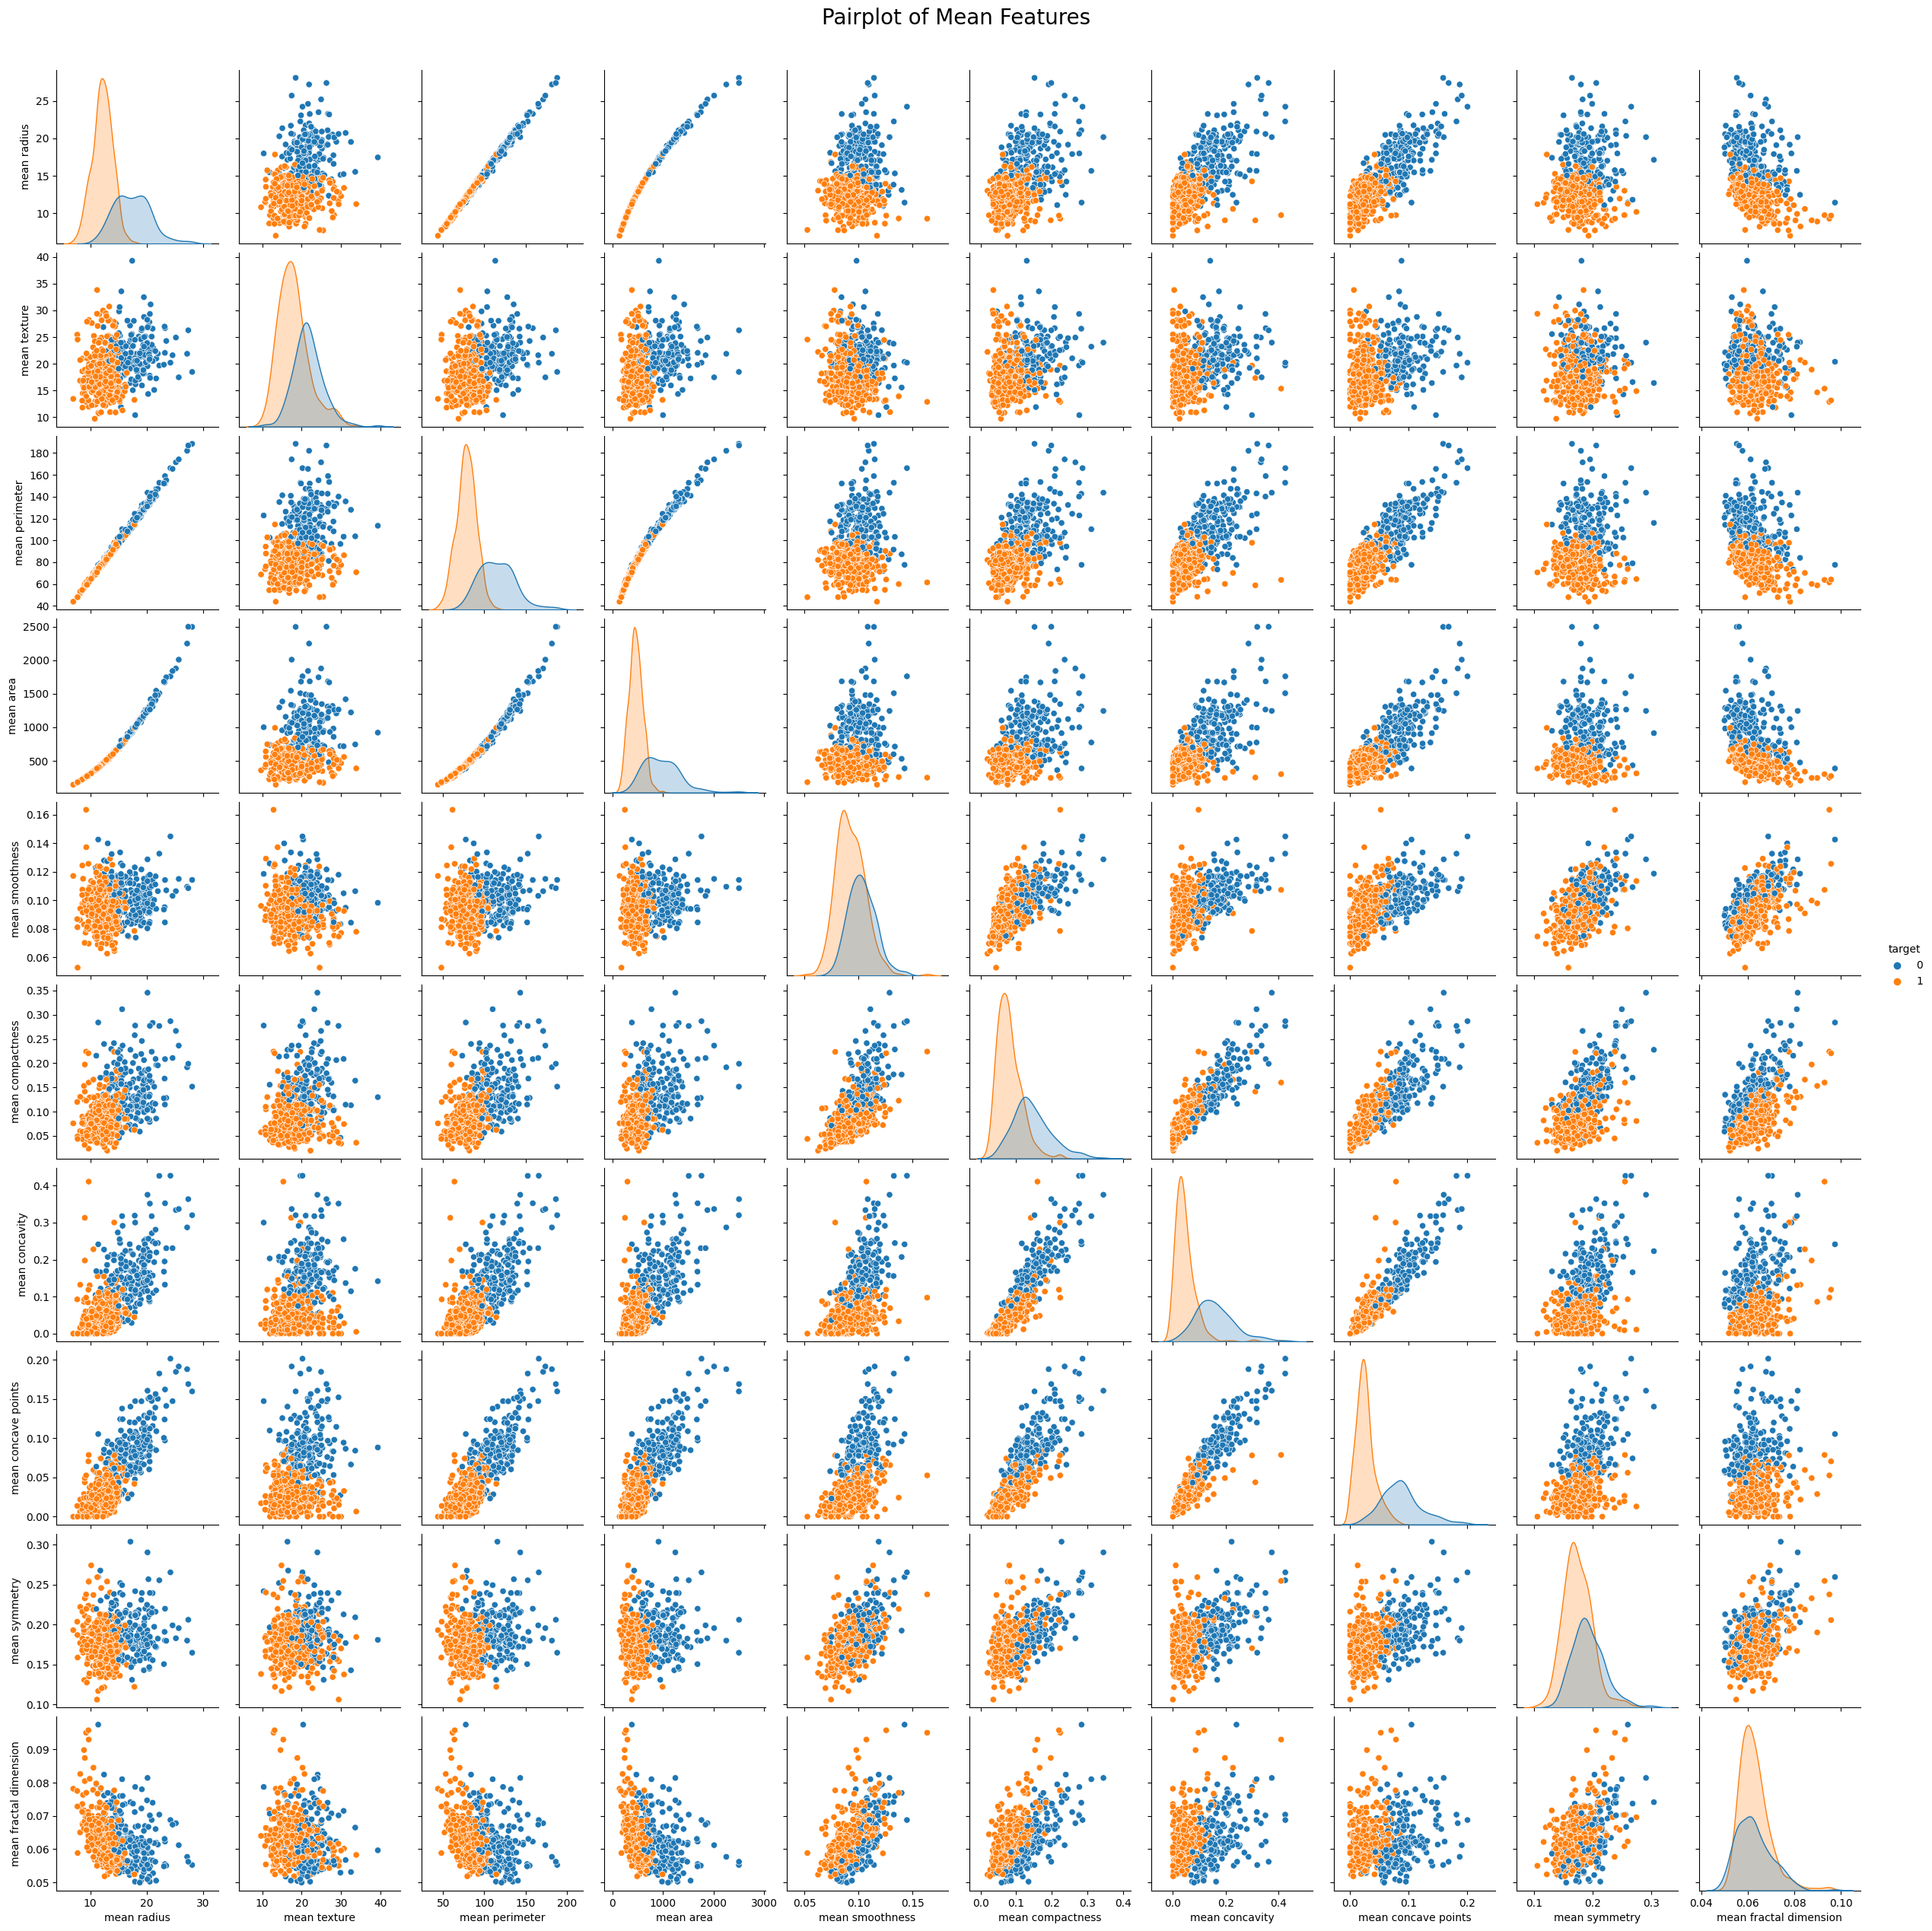

In [14]:
plot_pairplot(mean_features, 'Pairplot of Mean Features')

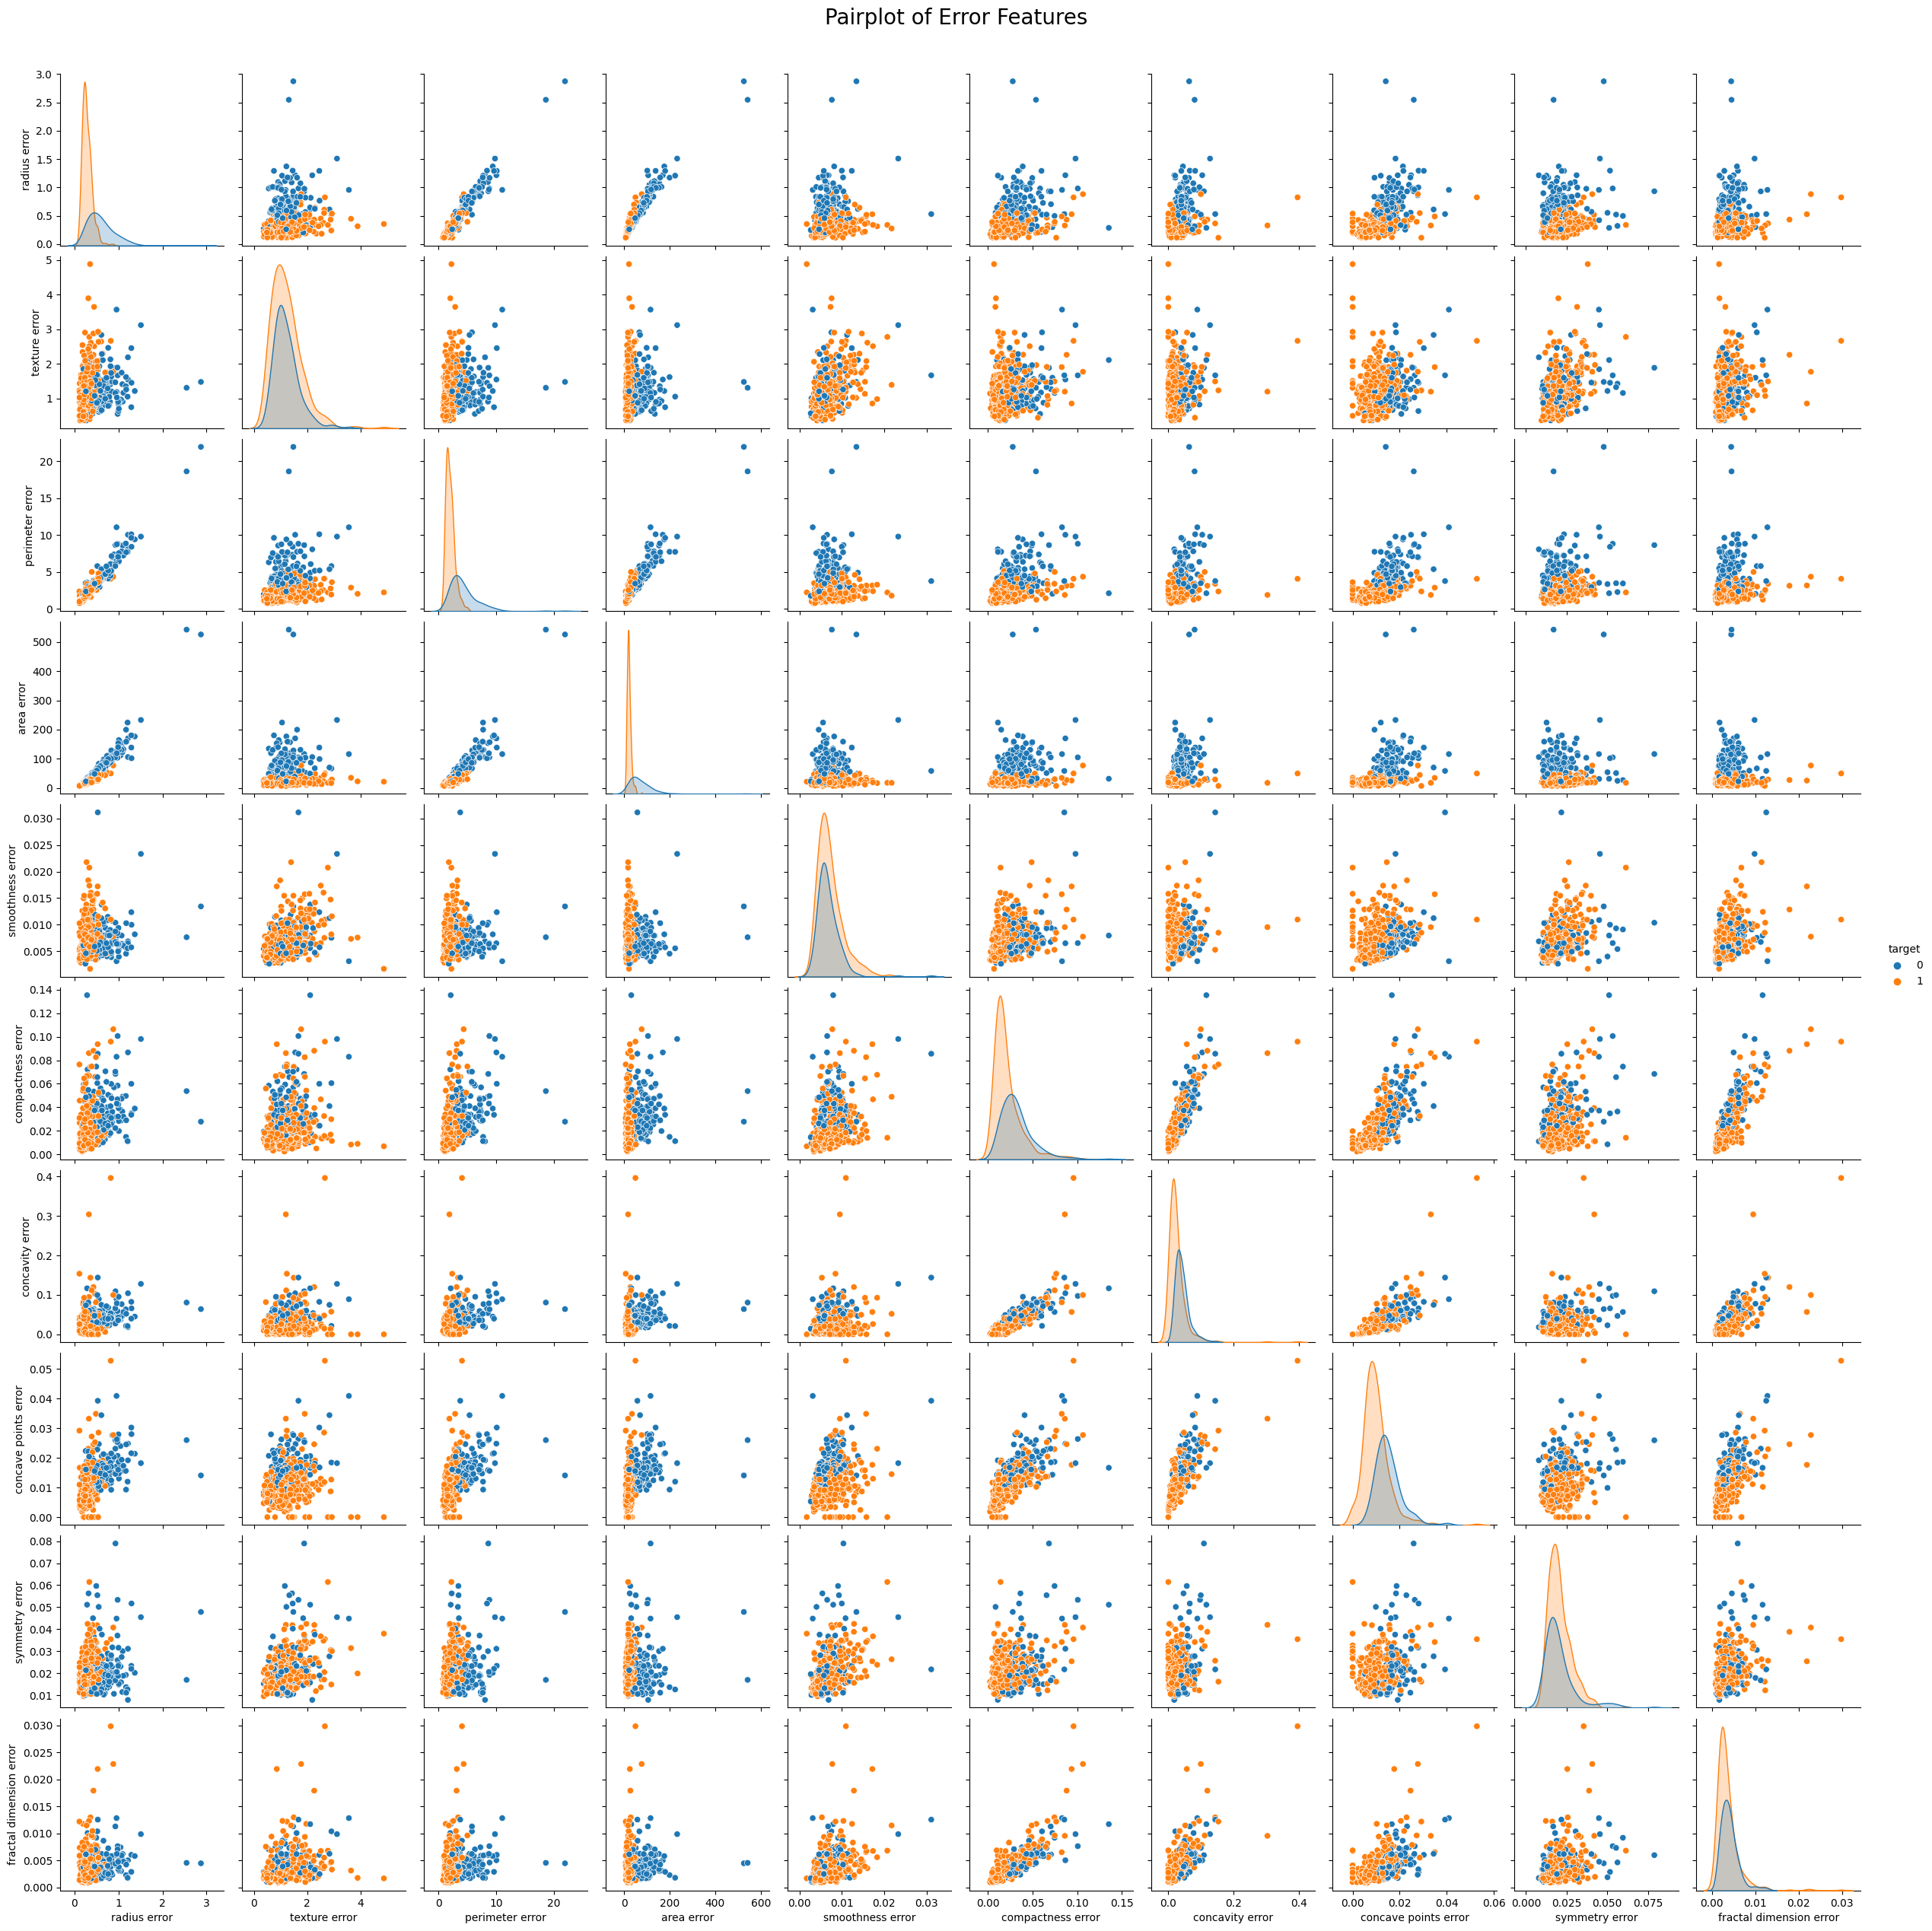

In [15]:
plot_pairplot(error_features, 'Pairplot of Error Features')

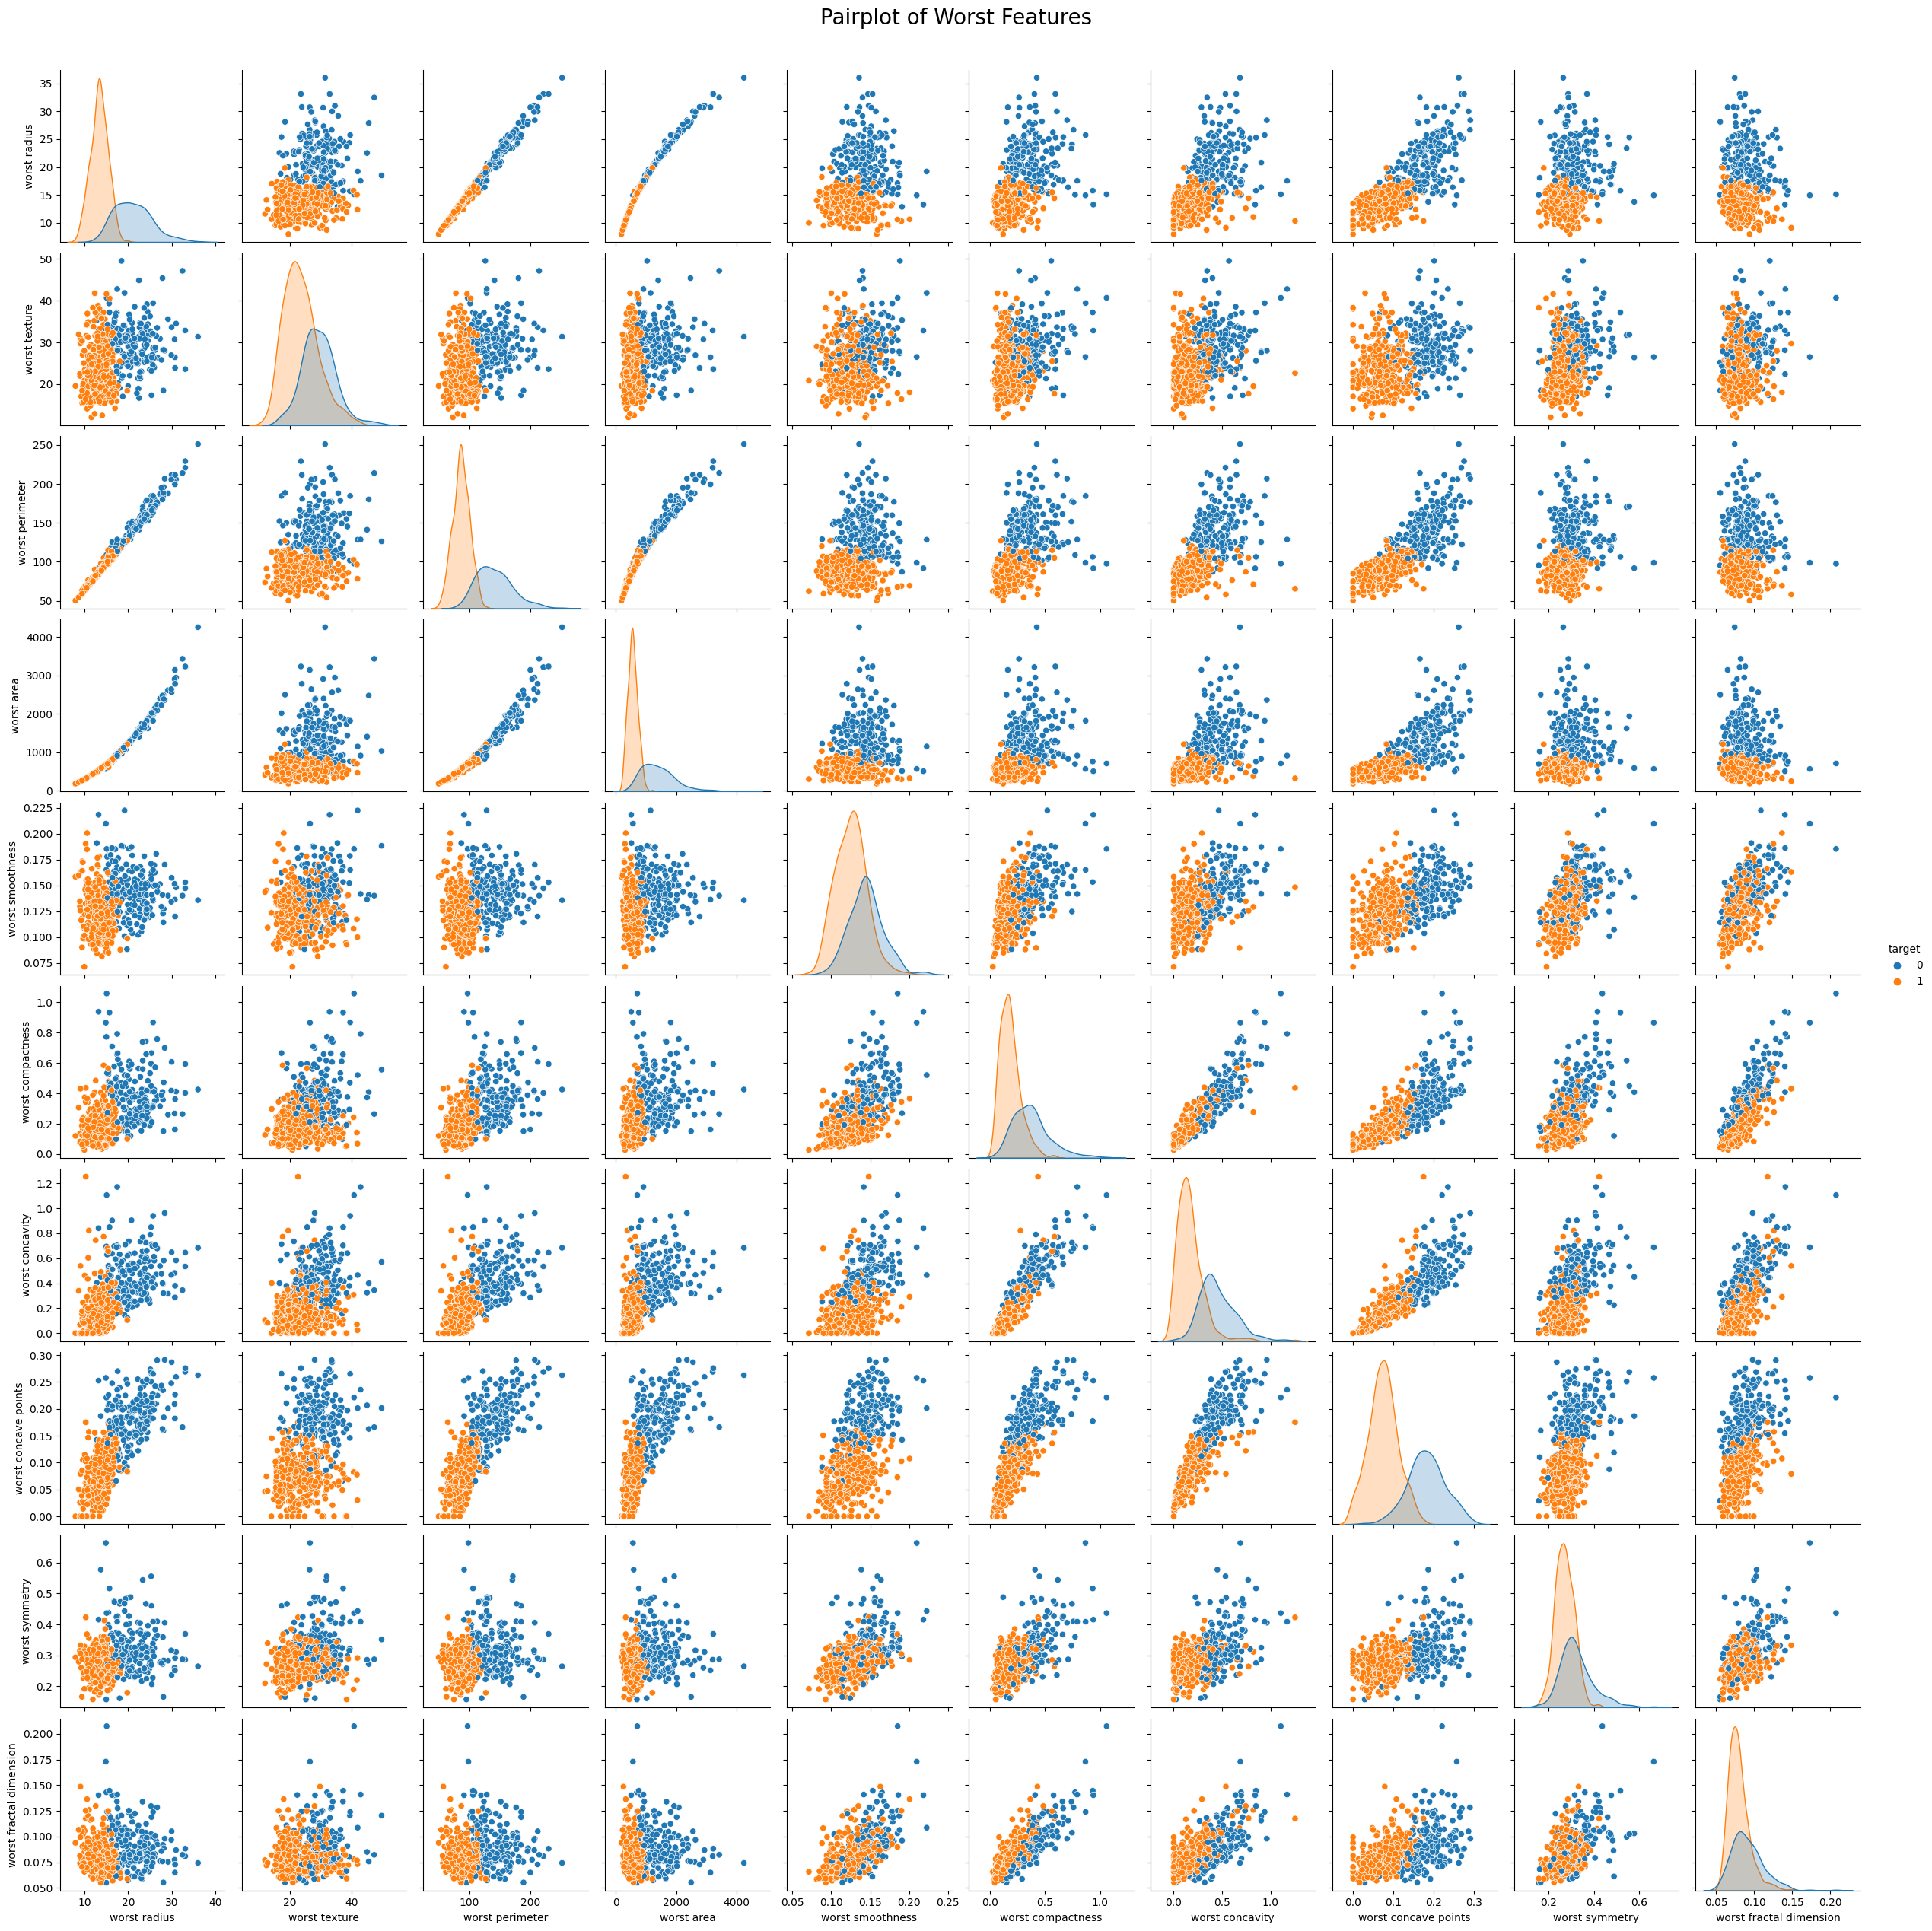

In [16]:
plot_pairplot(worst_features, 'Pairplot of Worst Features')

## HeatMap

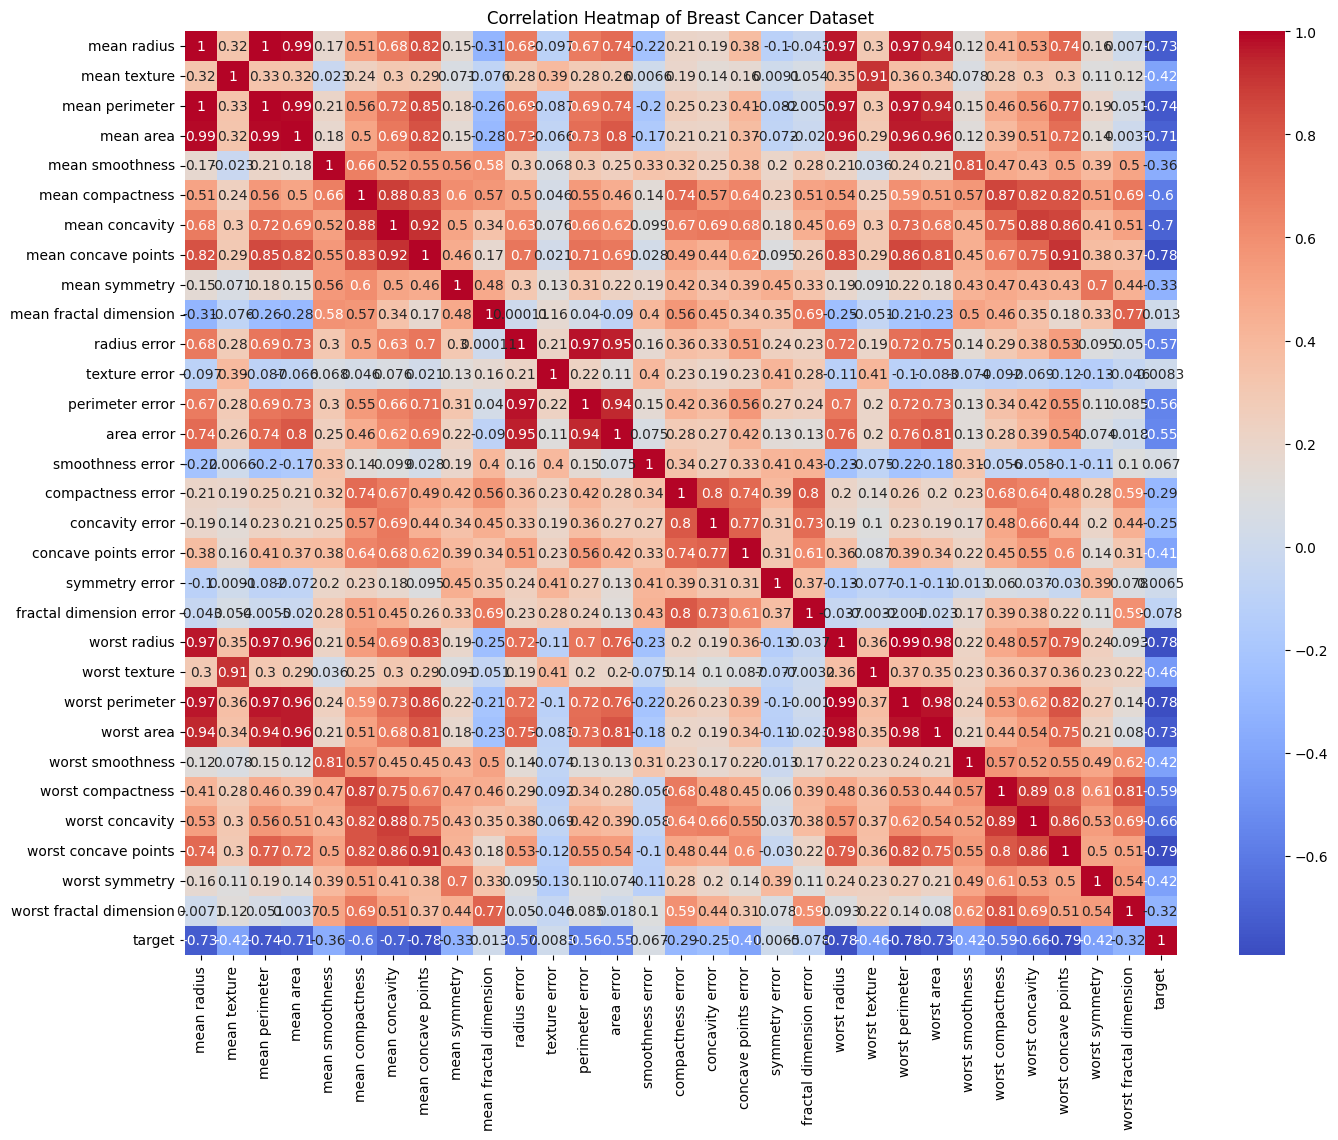

In [17]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()

In [18]:
class CustomKNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
start_custom = time.time()

custom_knn = CustomKNN(k=5)
custom_knn.fit(X_train, y_train)
y_pred_custom = custom_knn.predict(X_test)

end_custom = time.time()
time_taken_by_custom_knn = end_custom - start_custom
print(f"Time taken by custom knn: {time_taken_by_custom_knn} seconds")


Time taken by custom knn: 0.3678724765777588 seconds


In [24]:
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

print("Custom KNN Model Performance:")
print(f"Accuracy: {accuracy_custom}")
print(f"Precision: {precision_custom}")
print(f"Recall: {recall_custom}")
print(f"F1 Score: {f1_custom}")

Custom KNN Model Performance:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394


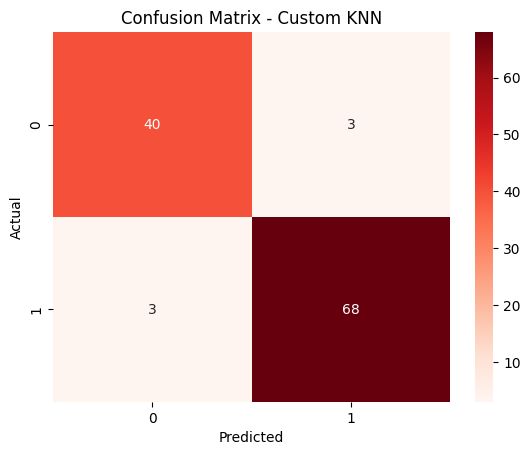

In [25]:
sns.heatmap(conf_matrix_custom, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Custom KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
start_sklearn_knn = time.time()

sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(X_train, y_train)
y_pred_sklearn = sklearn_knn.predict(X_test)

end_sklearn_knn = time.time()
time_taken_by_sklearn_knn = end_sklearn_knn - start_sklearn_knn
print(f"Time taken by custom knn: {time_taken_by_sklearn_knn} seconds")

Time taken by custom knn: 0.06019759178161621 seconds


In [28]:
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Sklearn KNN Model Performance:")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")
print(f"F1 Score: {f1_sklearn}")

Sklearn KNN Model Performance:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394


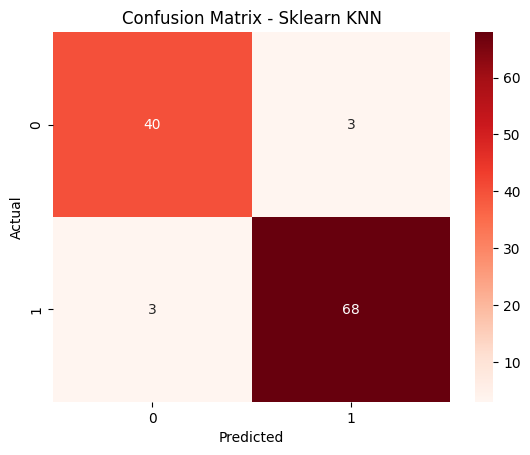

In [29]:
sns.heatmap(conf_matrix_sklearn, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Sklearn KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
print("Comparison of Custom KNN and Sklearn KNN:")
print(f"Accuracy Difference: {accuracy_custom - accuracy_sklearn}")
print(f"Precision Difference: {precision_custom - precision_sklearn}")
print(f"Recall Difference: {recall_custom - recall_sklearn}")
print(f"F1 Score Difference: {f1_custom - f1_sklearn}")


Comparison of Custom KNN and Sklearn KNN:
Accuracy Difference: 0.0
Precision Difference: 0.0
Recall Difference: 0.0
F1 Score Difference: 0.0


In [31]:
print("Comparison in  speed of Custom and  Sklearn KNN:")
print(f"Time taken by Custom KNN : {time_taken_by_custom_knn}")
print(f"Time taken by Sklearn KNN : {time_taken_by_sklearn_knn}")

Comparison in  speed of Custom and  Sklearn KNN:
Time taken by Custom KNN : 0.3678724765777588
Time taken by Sklearn KNN : 0.06019759178161621


# CONCLUSION

Both models—**Custom KNN** and **Sklearn KNN**— resulted in identical metric values, indicating comparable performance in terms of accuracy and other evaluation criteria. However, it is evident that the Custom KNN implementation is significantly slower compared to the Sklearn KNN.